In [1]:
from dsfunctions import forward_pass, forward_pass_nsteps, sample_windspeed, sample_winddirection, sample_geometry
from dsfunctions import plot_matrix, plot_matrix_ensemble, align_geoms, interpolate_geom, get_observation, plot_geometry
from dsfunctions import geom_to_vector

import farsiteutils_v2 as futils
import datetime
import uuid

import numpy as np
from matplotlib import pyplot as plt

from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
a = 1
b = 1.5
nphi = 20
n_vertex = nphi
phi = np.linspace(0,2*np.pi, nphi, endpoint=False)
nsteps = 100
step_size = 0.01

numberOfObservations = 5
observations = []
for i in range(numberOfObservations):
    x = (a*np.cos(phi))*(1.5**i)
    y = (b+i)*np.sin(phi)+i
    observations.append((x,y))

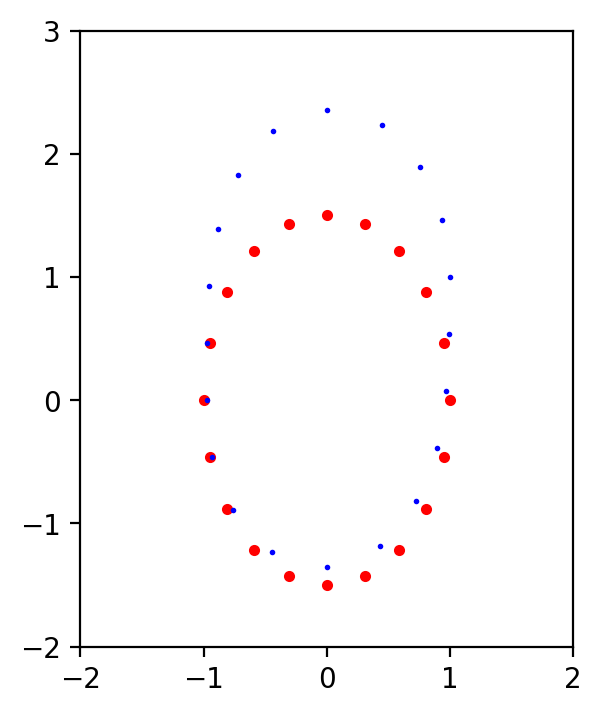

In [17]:
# wdlst = [90/180*np.pi]*200
wdlst = [90*np.pi/180]*100 + [90*np.pi/180]*100
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)

x,y = observations[0]
xfin, yfin = forward_pass_nsteps(x, y, wdlst, step_size, nsteps)
for i in range(numberOfObservations-4):
    x,y = observations[i]
    ax.plot(x,y, 'r.')
ax.plot(xfin, yfin, 'b.', ms=2)
ax.set_xlim(-2,2)
ax.set_ylim(-2,3)
ax.set_aspect('equal')

### Without interpolation

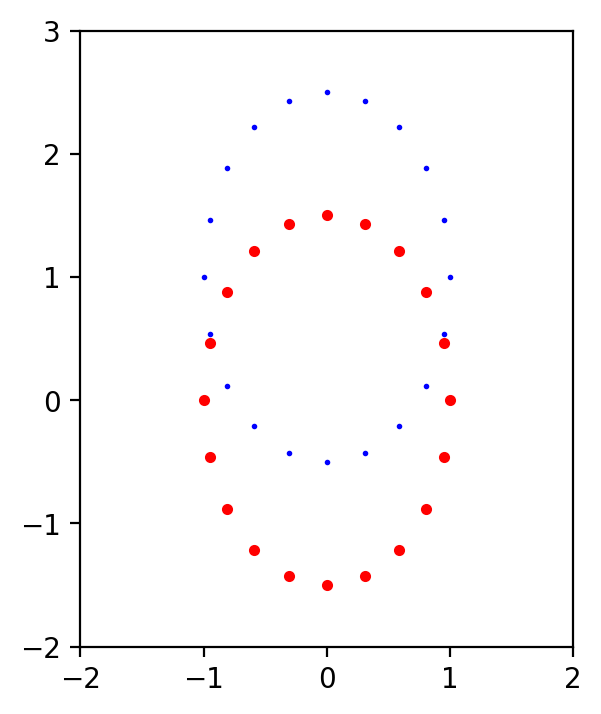

In [18]:

x,y = observations[0]
xfin = []
yfin = []
for xx,yy in zip(x,y):
    xf = xx + np.cos(np.pi/2)
    yf = yy + np.sin(np.pi/2)
    xfin.append(xf)
    yfin.append(yf)

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)

ax.plot(*observations[0], 'r.')
ax.plot(xfin, yfin, 'b.', ms=2)
ax.set_xlim(-2,2)
ax.set_ylim(-2,3)
ax.set_aspect('equal')